In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("train.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.isnull().sum())  # check missing values

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop("Cabin", axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Convert categorical to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Select useful features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", 
            "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [8]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)

      Feature  Coefficient
1         Sex     2.590161
5        Fare     0.002577
2         Age    -0.030545
4       Parch    -0.107617
6  Embarked_Q    -0.112056
3       SibSp    -0.295049
7  Embarked_S    -0.399199
0      Pclass    -0.938035


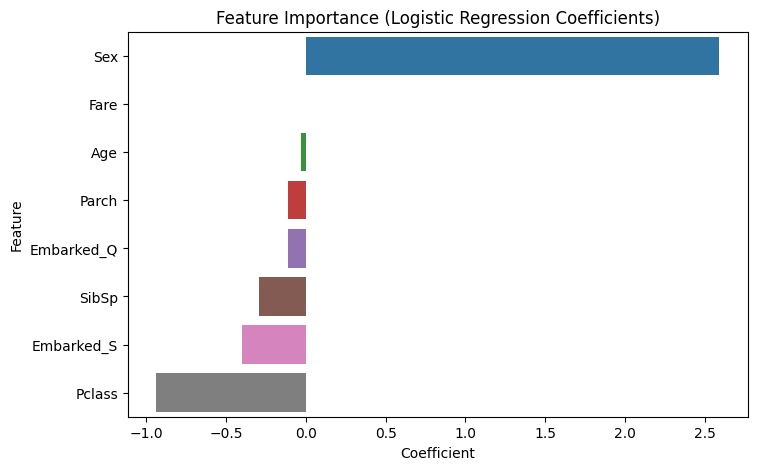

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()